Choose the given known, 1 for List or 2 for Function : 1
Insert the known list of x points : [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
Insert the known list of y points : [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Choose which x to evaluate: 3.5
Pick a method, L for Lagrange or N for Newton Divided Difference: N
Pick an approach, 1 for Forward NDD or 2 for Backward NDD: 1
Show the DD table? (Y for yes or P for pass): Y
|    x |    y |       DD1 |        DD2 |        DD3 |        DD4 |        DD5 |       DD6 |     DD7 |
|------+------+-----------+------------+------------+------------+------------+-----------+---------|
| 2    |  4.9 |  10       |   28       | 2195.56    | -2056.15   | 1149.6     | -594.847  | 269.799 |
| 2.15 |  6.4 |  17       |  686.667   | -641.938   |   358.013  | -182.853   |   79.6515 |         |
| 2.25 |  8.1 | 120       | -102.917   |   56.187   |   -24.1506 |    4.32776 |           |         |
| 2.3  | 14.1 |   3.7037  |    1.02881 |    8.12735 |   -14.4131 |           

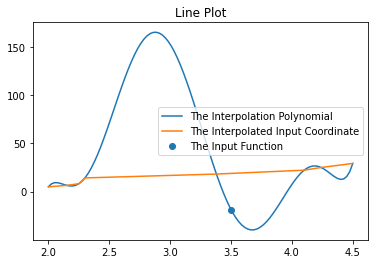

Another input? (Y/N): N


In [6]:
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt #Untuk menggambarkan plot grafik dari fungsi
from tabulate import tabulate #Untuk membuat bentuk tabel dan mengisi isi tabelnya

def up(x_coord): #Mendisplay header tabel x|y|DD1|DD2|DD3...
    alpha = ['x','y'] 
    beta = len(x_coord)
    p = 0
    while p < beta:
        alpha.append('DD'+str(p+1))
        p = p + 1
    return (alpha)

def DivDiffGen(x_coord,y_coord): #Mengisi kolom dan baris tabel dengan koordinat yang diberikan dan perhitungan Divided Difference selanjutnya dan secukupnya
    Table= [y_coord]
    T = []
    p = 0
    while p < len(x_coord):
        T.append([x_coord[p],y_coord[p]])
        p = p + 1
    kolom = 1
    while kolom < len(y_coord):
        DDkolom = []
        p = 0
        baris = 0
        while baris < (len(Table[-1])-1):
            DD = (Table[-1][baris+1]-Table[-1][baris])/(x_coord[kolom+baris]-x_coord[baris])
            DDkolom.append(DD)
            T[p].append(DD)
            p = p + 1
            baris = baris + 1
        Table.append(DDkolom)
        kolom = kolom + 1
    return Table,tabulate(T, headers = up(absis_x), tablefmt = "orgtbl")

def LagrPol(x,x_coord,y_coord): #Mencari fungsi polinomial dengan metode Lagrange
    Poly = 0
    r = len(x_coord)
    x=sym.Symbol('x')
    q = 0
    while q < r:
        L = 1
        p = 0
        while p < r:
            if p != q:
                L*=((x-x_coord[p])/(x_coord[q]-x_coord[p]))
            p = p + 1
        Poly += y_coord[q]*L
        q = q + 1
    return sym.expand(Poly)

def Lagr(x,x_coord,y_coord): #Mencari nilai fungsi dari x yang diinput dengan metode Lagrange
    Poly = 0
    r = len(x_coord)
    q = 0
    while q < r:
        L = 1
        p = 0
        while p < r:
            if p != q:
                L*=((x-x_coord[p])/(x_coord[q]-x_coord[p]))
            p = p + 1
        Poly+= y_coord[q]*L
        q = q + 1
    return Poly 
  
def ForwDivDiff(x,x_coord,y_coord): #Mencari nilai fungsi dari x yang diinput dengan metode Newton Forward Divided Difference
    Table = DivDiffGen(x_coord,y_coord)[0]
    Poly = Table[0][0]
    delta = 1
    p = 1
    while p < len(Table):
        delta*=(x-x_coord[p-1])
        Poly+=Table[p][0]*delta
        p = p + 1
    return Poly 

def ForwDivDiffPol(x,x_coord,y_coord): #Mencari nilai fungsi polinomial dengan metode Newton Forward Divided Difference
    Table = DivDiffGen(x_coord,y_coord)[0]
    Poly =Table[0][0]
    delta = 1
    x=sym.Symbol('x')
    p = 1
    while p < len(Table):
        delta*=(x-x_coord[p-1])
        Poly+=Table[p][0]*delta
        p = p + 1
    return sym.expand(Poly)

def BackwDivDiff(x,x_coord, y_coord): #Mencari nilai fungsi dari x yang diinput dengan metode Newton Backward Divided Difference
    Table = DivDiffGen(x_coord,y_coord)[0]
    Poly= Table[0][-1]
    delta = 1
    p = 1
    while p < len(Table):
        delta*=(x-x_coord[-p])
        Poly+=Table[p][-1]*delta
        p = p + 1
    return Poly

def BackwDivDiffPol(x,x_coord, y_coord): #Mencari fungsi polinomial dengan metode Newton Forward Divided Difference
    Table = DivDiffGen(x_coord,y_coord)[0]
    Poly = Table[0][-1]
    delta = 1
    x=sym.Symbol('x')
    p = 1
    while p < len(Table):
        delta*=(x-x_coord[-p])
        Poly +=Table[p][-1]*delta
        p = p + 1
    return sym.expand(Poly )

def TableResult(x_value,x_coord,y_coord): #Untuk membuat tabel berisi koordinat x & y yang diberikan serta yang diperoleh
    coord=[['x','y']]
    x=x_coord.copy()
    y=y_coord.copy()
    p = 0
    while p < len(x):
        if x_value < x[p]:
            x.insert(p,x_value)
            y.insert(p,number)
            break
        p = p + 1
    if x_value > x[len(x)-1]:
        x.append(x_value)
        y.append(number)
    p = 0
    while p < len(x):
        coord.append([x[p],y[p]])
        p = p + 1
    return tabulate(coord,headers = "firstrow", tablefmt = "orgtbl")

def f(x):
    return eval(equation) 

evaluation='Y' #starting variabel agar dapat melakukan percobaan ulang
while evaluation=='Y':
    epsilon=eval(input('Choose the given known, 1 for List or 2 for Function : ')) #Menu untuk memilih data yang diberikan berupa koordinat/fungsinya
    if epsilon==1:
        absis_x = eval(input('Insert the known list of x points : ')) #Masukan nilai x yang diberikan
        absis_y = eval(input('Insert the known list of y points : ')) #Masukan nilai y yang diberikan
    elif epsilon==2:
        equation= input('Insert the function: ') #Masukan fungsi yang diberikan
        lowbound = eval(input('Insert a lower bound: ')) #Masukan batas bawah fungsi
        upbound = eval(input('Insert an upper bound: ')) #Masukan batas atas fungsi
        partitions= eval(input('Many partitions : ')) #Masukan jumlah partisi yang diinginkan
        absis_x_array = np.linspace(lowbound,upbound,partitions)
        absis_y_array = f(absis_x_array)
        absis_x = list(absis_x_array )
        absis_y = list(absis_y_array )
    x_value = eval(input('Choose which x to evaluate: ')) #Masukan nilai x yang ingin dicari nilai ynya
    trigger = 0
    method=input('Pick a method, L for Lagrange or N for Newton Divided Difference: ') #Menu untuk memilih ingin menggunakan metode Lagrange/Newton
    if method != 'L':
        trigger = eval(input('Pick an approach, 1 for Forward NDD or 2 for Backward NDD: ')) #Menu untuk memilih ingin menggunakan Forward/Backward NDD
        if trigger == 1:
            trigger = 2
        elif trigger == 2:
            trigger = 3
        tabeldd = input('Show the DD table? (Y for yes or P for pass): ') #Menu untuk memilih ingin melihat tabel Divided Difference atau tidak
        if tabeldd =='Y':
            print(DivDiffGen(absis_x,absis_y)[1])

    else:
        trigger = 1
    ForwApprox = ForwDivDiff(x_value,absis_x,absis_y) #Berisi nilai aproksimasi dari Newton Forward Divided Difference
    ForwPoly = ForwDivDiffPol(x_value,absis_x,absis_y) #Berisi polinomial fungsi dari Newton Forward Divided Difference
    BackApprox = BackwDivDiff(x_value,absis_x, absis_y) #Berisi nilai aproksimasi dari Newton Backward Divided Difference
    BackwPoly = BackwDivDiffPol(x_value,absis_x, absis_y) #Berisi polinomial fungsi dari Newton Forward Divided Difference
    LagrApprox = Lagr(x_value,absis_x, absis_y) #Berisi nilai aproksimasi dari metode Lagrange
    LagrangePol = LagrPol(x_value, absis_x, absis_y) #Berisi polinomial fungsi dari metode Lagrange
    head=up(absis_x)
    if trigger == 1:
        number = LagrApprox
        print('Lagrange Polynomial = ',LagrangePol) #Mendisplay polinomial fungsi dari metode Lagrange
        print('for x = {0}, using Lagrange, y is approximately {1:.9f}'.format(x_value,LagrApprox)) #Mendisplay nilai aproksimasi dari metode Lagrange sebanyak 9 digit
        output = eval(input('Choose what to display, 1 for table or 2 for plot : ')) #Menu untuk memilih tabel berisi koordinat semua titik/grafik fungsinya
        if output == 1:
            print(TableResult(x_value,absis_x,absis_y))
        else :
            value=len(absis_x)-1
            x=np.linspace(absis_x[0],absis_x[value],100)
            y=Lagr(x,absis_x, absis_y)
            plt.plot(x,y)
            plt.scatter(x_value,number)
            x=absis_x
            y=absis_y
            plt.plot(x,y)
            plt.title('Line Plot')
            plt.legend(['The Interpolation Polynomial','The Interpolated Input Coordinate','The Input Function'])
            plt.show()
    elif trigger == 2:
        number = ForwApprox
        print('Forward NDD Polynomial = ',ForwPoly) #Mendisplay polinomial fungsi dari Newton Forward Divided Difference
        print('for x = {0}, using Forward NDD, y is approximately {1:.9f}'.format(x_value,ForwApprox)) #Mendisplay nilai aproksimasi dari Newton Forward Divided Difference sebanyak 9 digit
        output = eval(input('Choose what to display, 1 for table or 2 for plot : ')) #Menu untuk memilih tabel berisi koordinat semua titik/grafik fungsinya
        if output == 1:
            print(TableResult(x_value,absis_x,absis_y))
        else :
            value=len(absis_x)-1
            x=np.linspace(absis_x[0],absis_x[value],100)
            y=ForwDivDiff(x,absis_x, absis_y)
            plt.plot(x,y)
            plt.scatter(x_value,number)
            x=absis_x
            y=absis_y
            plt.plot(x,y)
            plt.title('Line Plot')
            plt.legend(['The Interpolation Polynomial','The Interpolated Input Coordinate','The Input Function'])
            plt.show()
    elif trigger == 3:
        number = BackApprox
        print('Backward NDD Polynomial = ',BackwPoly) #Mendisplay polinomial fungsi dari Newton Backward Divided Difference
        print('for x = {0}, using Backward NDD, y is approximately {1:.9f}'.format(x_value,BackApprox)) #Mendisplay nilai aproksimasi dari Newton Backward Divided Difference sebanyak 9 digit
        output = eval(input('Choose what to display, 1 for table or 2 for plot :')) #Menu untuk memilih tabel berisi koordinat semua titik/grafik fungsinya
        if output == 1:
            print(TableResult(x_value,absis_x,absis_y))
        else :
            value=len(absis_x)-1
            x=np.linspace(absis_x[0],absis_x[value],100)
            y=BackwDivDiff(x,absis_x, absis_y)
            plt.plot(x,y)
            plt.scatter(x_value,number)
            x=absis_x
            y=absis_y
            plt.plot(x,y)
            plt.title('Line Plot[')
            plt.legend(['The Interpolation Polynomial','The Interpolated Input Coordinate','The Input Function'])
            plt.show()
    evaluation=input('Another input? (Y/N): ')

In [4]:
#Setelah 3 menit 30 detik, Clawhauser akan menempuh jarak +/- 18.68 km
#Angka itu didapat dari interpolasi metode Lagrange, Newton Forward dan Backward Divided Difference
#Ketiga interpolasi memberikan nilai sama yaitu -18.68276412 
#Karena jarak tidak mungkin bernilai negatif maka nilai yang diperoleh akan dimutlakan
#Salah satu kemungkinan alasan mengapa nilai yang diberikan negatif berupa fungsi interpolasi yang diperoleh memperhitungan arah si Cheetah tersebut berlari
#Ditambah, jarak yang diperoleh masih memenuhi interval jarak 18.1 km-22.1 km saat waktunya 3.38 hingga 4.1
#Kesimpulan yang diambil berupa metode Lagrange, Newton Forward dan Backward Divided Difference ketiganya memiliki tingkat akurasi yang cukup tinggi
#Bisa dikatakan juga metode Lagrange lebih singkat kalkulasinya 
#sementera Newton Forward dan Backward Divided Difference lebih detail sehingga lebih cepat mencapai akurasinya dibandingkan metode Lagrange